In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [2]:
os.listdir()

['.ipynb_checkpoints', 'HND.TO (1).csv', 'stock price prediction.ipynb']

In [3]:
file = pd.read_csv('HND.TO (1).csv')
file.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-14,20.230000,21.040001,20.100000,20.850000,20.850000,7800
1,2008-01-21,22.000000,22.940001,21.040001,21.040001,21.040001,24300
2,2008-01-28,21.040001,21.299999,20.160000,21.299999,21.299999,1700
3,2008-02-04,21.080000,21.250000,18.900000,19.270000,19.270000,7000
4,2008-02-11,18.120001,18.570000,16.799999,17.459999,17.459999,59300


In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       754 non-null    object 
 1   Open       754 non-null    float64
 2   High       754 non-null    float64
 3   Low        754 non-null    float64
 4   Close      754 non-null    float64
 5   Adj Close  754 non-null    float64
 6   Volume     754 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.4+ KB


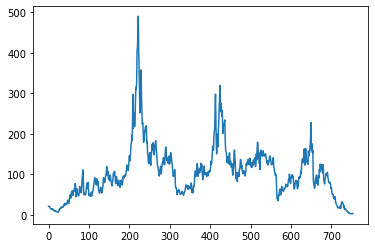

In [33]:
plt.plot(file['Close'])

In [6]:
file['rollingmean'] = file['Close'].rolling(7).mean()
file.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,rollingmean
0,2008-01-14,20.230000,21.040001,20.100000,20.850000,20.850000,7800,NaN
1,2008-01-21,22.000000,22.940001,21.040001,21.040001,21.040001,24300,NaN
2,2008-01-28,21.040001,21.299999,20.160000,21.299999,21.299999,1700,NaN
3,2008-02-04,21.080000,21.250000,18.900000,19.270000,19.270000,7000,NaN
4,2008-02-11,18.120001,18.570000,16.799999,17.459999,17.459999,59300,NaN
5,2008-02-18,16.309999,16.700001,15.160000,15.170000,15.170000,102800,NaN
6,2008-02-25,15.000000,15.850000,14.250000,14.550000,14.550000,219000,18.520000
7,2008-03-03,14.500000,14.870000,12.720000,13.310000,13.310000,238200,17.442857
8,2008-03-10,13.530000,13.700000,11.990000,13.010000,13.010000,191300,16.295714
9,2008-03-17,13.510000,16.059999,13.110000,15.000000,15.000000,244700,15.395714


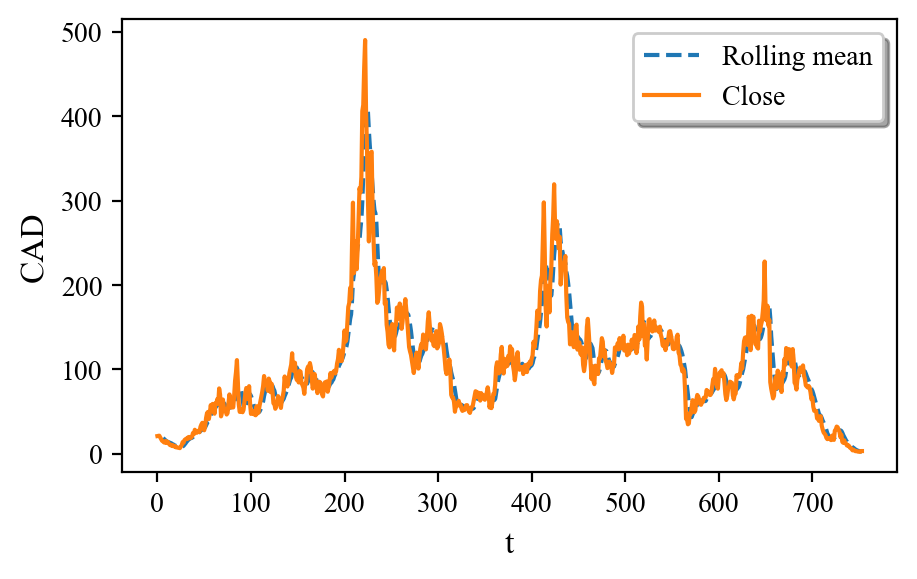

In [7]:
plt.figure(figsize=(5,3), dpi=200)
#plt.figure(figsize=(25,20))
#plt.title('Some plots', fontdict={'fontname':'Times New Roman', 'fontsize': 16})

#plt.plot(x1, y1, 'yo', label = 'Cr')
#plt.plot(x1, y2, 'rs', label = 'Mn')
#plt.plot(x1, y3, 'bD', label = 'Mo')
#plt.plot(x2, y4, 'c^', label = 'Nb')
#plt.plot(x2, y5, 'ks', fillstyle='none', label = 'Ti')

plt.plot(file['rollingmean'], '--', label = 'Rolling mean')
plt.plot(file['Close'], label = 'Close')


# colors - b g r c m y k w
# markers - filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
# markers - fillstyles = ('full', 'left', 'right', 'bottom', 'top', 'none')
plt.xlabel('t', fontdict={'fontname':'Times New Roman', 'fontsize': 12})
plt.ylabel('CAD', fontdict={'fontname':'Times New Roman', 'fontsize': 12})

#plt.xticks([0,2,4,6,8,10,12,14])
#plt.yticks([0,5,10,15])
plt.xticks(fontsize= 10, fontname = 'Times New Roman')
plt.yticks(fontsize= 10, fontname = 'Times New Roman')
#secax = plt.secondary_xaxis('right', y1)

#plt.axes().yaxis.set_tick_params(which='minor', right = 'off')

plt.legend(loc='best', shadow = True, fontsize= 10, prop={'family': 'Times New Roman'})
# loc = best, upper right,
plt.show()

In [8]:
X = pd.DataFrame(file['Close'])
X

,Close
0,20.850000
1,21.040001
2,21.299999
3,19.270000
4,17.459999
...,...
749,2.310000
750,2.340000
751,2.120000
752,3.060000


In [9]:
sc = MinMaxScaler(feature_range=(0, 1))
X_scaled = sc.fit_transform(X)

In [10]:
X_train = []
y_train = []
for i in range(60, 600):
    X_train.append(X_scaled[i-60:i, 0])
    y_train.append(X_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [16]:
regressor = Sequential()

In [17]:
regressor.add(LSTM(units = 25, return_sequences = True, 
                   input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 25, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 25, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 25))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [18]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 50, batch_size = 16)

Epoch 1/50
34/34 [==============================] - 13s 52ms/step - loss: 0.0199
Epoch 2/50
34/34 [==============================] - 2s 52ms/step - loss: 0.0112
Epoch 3/50
34/34 [==============================] - 2s 52ms/step - loss: 0.0090
Epoch 4/50
34/34 [==============================] - 2s 51ms/step - loss: 0.0068
Epoch 5/50
34/34 [==============================] - 2s 52ms/step - loss: 0.0069
Epoch 6/50
34/34 [==============================] - 2s 52ms/step - loss: 0.0073
Epoch 7/50
34/34 [==============================] - 2s 52ms/step - loss: 0.0073
Epoch 8/50
34/34 [==============================] - 2s 59ms/step - loss: 0.0068
Epoch 9/50
34/34 [==============================] - 2s 62ms/step - loss: 0.0058
Epoch 10/50
34/34 [==============================] - 2s 57ms/step - loss: 0.0051
Epoch 11/50
34/34 [==============================] - 2s 57ms/step - loss: 0.0058
Epoch 12/50
34/34 [==============================] - 2s 58ms/step - loss: 0.0058
Epoch 13/50
34/34 [=================

In [20]:
X_test = []
for i in range(660, 720):
    X_test.append(X_scaled[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
psp = sc.inverse_transform(predicted_stock_price)

2/2 [==============================] - 6s 13ms/step


In [29]:
temp = np.array(file['Close'][659:719])
temp

array([ 68.699997,  86.199997,  91.      ,  77.599998,  98.400002,
        81.300003,  78.800003,  81.699997,  73.099998,  96.599998,
        91.5     , 111.900002, 105.199997, 125.199997, 120.900002,
       112.900002, 123.900002, 123.300003, 108.699997, 103.300003,
       124.      , 111.099998,  84.      ,  82.199997,  76.      ,
        88.      ,  91.699997,  99.099998, 102.099998,  98.      ,
        97.      , 104.599998,  92.699997,  88.800003,  80.900002,
        79.599998,  78.400002,  80.300003,  78.699997,  72.900002,
        64.400002,  66.599998,  55.599998,  50.700001,  50.599998,
        50.700001,  41.799999,  43.200001,  38.799999,  44.299999,
        44.299999,  33.299999,  28.700001,  25.200001,  23.700001,
        22.200001,  18.700001,  17.200001,  18.      ,  18.4     ])

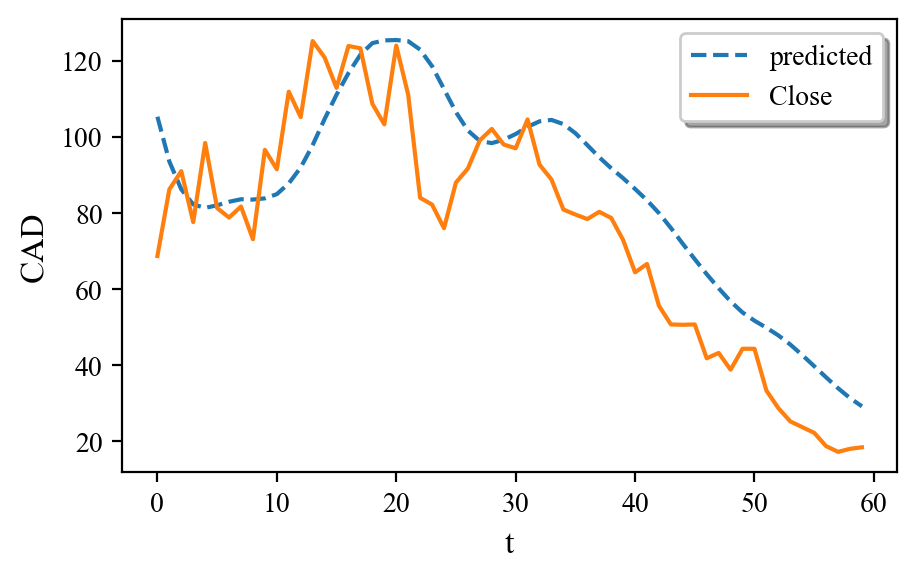

In [30]:
plt.figure(figsize=(5,3), dpi=200)
#plt.figure(figsize=(25,20))
#plt.title('Some plots', fontdict={'fontname':'Times New Roman', 'fontsize': 16})

plt.plot(psp, '--', label = 'predicted')
plt.plot(temp, label = 'Close')

plt.xlabel('t', fontdict={'fontname':'Times New Roman', 'fontsize': 12})
plt.ylabel('CAD', fontdict={'fontname':'Times New Roman', 'fontsize': 12})

#plt.xticks([0,2,4,6,8,10,12,14])
#plt.yticks([0,5,10,15])
plt.xticks(fontsize= 10, fontname = 'Times New Roman')
plt.yticks(fontsize= 10, fontname = 'Times New Roman')
#secax = plt.secondary_xaxis('right', y1)

#plt.axes().yaxis.set_tick_params(which='minor', right = 'off')

plt.legend(loc='best', shadow = True, fontsize= 10, prop={'family': 'Times New Roman'})
# loc = best, upper right,
plt.show()